In [2]:
import pandas as pd
import requests
from pathlib import Path
import json
import datetime
import numpy as np
import os

import matplotlib.pyplot as plt
# Import ClusterCentroids from imblearn
from imblearn.under_sampling import ClusterCentroids
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import ExtraTreesClassifier


#my private libraries
import load_data as ld
import twitter_lib as tl
import wsj_lib as wsj
import ml_lib as ml


In [3]:
prefix='btc'  # used for creating file name
coin_ticker='BTC-USD'
source = 'reddit'      # for augmento

coin = 'bitcoin'       # used in Augmento 
num_of_periods = 1000   # 1000 days  usedin Augmento
bin_size='24H'          #default bin size for Augmento

# used by Augmento and Yahoo Finance Apis
start="2019-04-01T00:00:00Z"
end ="2022-01-30T00:00:00Z"


In [4]:
# Get sentiment from twitter/ reddit data obtained from augmento site 
sentiment_df = tl.get_crypto_sentiment_from_augmento(source, coin, num_of_periods, start, end, bin_size)

In [5]:
sentiment_df.head()

,FOMO,Uncertain,Hopeful,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,Annoyed/Frustrated,Bullish,Optimistic,Happy,Euphoric/Excited
Date,,,,,,,,,,,,,,,
2019-04-01,16.0,70.0,41.0,37.0,37.0,5.0,64.0,22.0,3.0,1.0,2.0,63.0,78.0,22.0,83.0
2019-04-02,45.0,145.0,68.0,97.0,64.0,11.0,132.0,53.0,4.0,1.0,6.0,188.0,144.0,61.0,179.0
2019-04-03,49.0,175.0,60.0,89.0,75.0,17.0,155.0,59.0,14.0,4.0,4.0,166.0,193.0,55.0,181.0
2019-04-04,34.0,142.0,52.0,79.0,67.0,18.0,131.0,44.0,7.0,2.0,5.0,92.0,154.0,44.0,110.0
2019-04-05,25.0,113.0,43.0,41.0,55.0,10.0,124.0,34.0,15.0,2.0,2.0,70.0,157.0,38.0,114.0


In [6]:
# Get sentiment from WSJ data using NLTK library
#wsj_sentiment=wsj.get_sentiments_from_wsj()

In [7]:
#wsj_sentiment.head()

In [8]:
'''
wsj_sentiment=wsj_sentiment.reset_index()
wsj_sentiment['Date']=pd.to_datetime(wsj_sentiment['Date'])
wsj_sentiment=wsj_sentiment.set_index('Date')
wsj_sentiment=wsj_sentiment.groupby(by='Date').mean()
'''

"\nwsj_sentiment=wsj_sentiment.reset_index()\nwsj_sentiment['Date']=pd.to_datetime(wsj_sentiment['Date'])\nwsj_sentiment=wsj_sentiment.set_index('Date')\nwsj_sentiment=wsj_sentiment.groupby(by='Date').mean()\n"

In [9]:
#sentiment_df = wsj_sentiment.copy()
sentiment_df.index

Index([2019-04-01, 2019-04-02, 2019-04-03, 2019-04-04, 2019-04-05, 2019-04-06,
       2019-04-07, 2019-04-08, 2019-04-09, 2019-04-10,
       ...
       2021-12-16, 2021-12-17, 2021-12-18, 2021-12-19, 2021-12-20, 2021-12-21,
       2021-12-22, 2021-12-23, 2021-12-24, 2021-12-25],
      dtype='object', name='Date', length=1000)

In [10]:
# sentiment_df index is of 'object' type. needs to change to datetime index, like the coin index from yahoo fin
sentiment_df=sentiment_df.reset_index()
sentiment_df['Date']=pd.to_datetime(sentiment_df['Date'])
sentiment_df=sentiment_df.set_index('Date')

In [11]:
sentiment_df.head()

,FOMO,Uncertain,Hopeful,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,Annoyed/Frustrated,Bullish,Optimistic,Happy,Euphoric/Excited
Date,,,,,,,,,,,,,,,
2019-04-01,16.0,70.0,41.0,37.0,37.0,5.0,64.0,22.0,3.0,1.0,2.0,63.0,78.0,22.0,83.0
2019-04-02,45.0,145.0,68.0,97.0,64.0,11.0,132.0,53.0,4.0,1.0,6.0,188.0,144.0,61.0,179.0
2019-04-03,49.0,175.0,60.0,89.0,75.0,17.0,155.0,59.0,14.0,4.0,4.0,166.0,193.0,55.0,181.0
2019-04-04,34.0,142.0,52.0,79.0,67.0,18.0,131.0,44.0,7.0,2.0,5.0,92.0,154.0,44.0,110.0
2019-04-05,25.0,113.0,43.0,41.0,55.0,10.0,124.0,34.0,15.0,2.0,2.0,70.0,157.0,38.0,114.0


In [12]:
df_coin= ld.load_from_yahoo([coin_ticker], start,end)

In [13]:
df_coin.head()

BTC-USD                                                      \
                   high          low         open        close       volume   
Date                                                                          
2019-04-01  4164.953125  4096.901367  4105.362305  4158.183105  10157794171   
2019-04-02  4905.954590  4155.316895  4156.919434  4879.877930  21315047816   
2019-04-03  5307.003418  4876.621094  4879.958008  4973.021973  22899891582   
2019-04-04  5063.159668  4836.793945  4971.307617  4922.798828  18251810240   
2019-04-05  5053.509766  4919.491699  4922.806152  5036.681152  16837325387   

                         
              adj close  
Date                     
2019-04-01  4158.183105  
2019-04-02  4879.877930  
2019-04-03  4973.021973  
2019-04-04  4922.798828  
2019-04-05  5036.681152

In [14]:
df_coin.index

DatetimeIndex(['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08',
               '2019-04-09', '2019-04-10',
               ...
               '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25',
               '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29',
               '2022-01-30', '2022-01-31'],
              dtype='datetime64[ns]', name='Date', length=1037, freq=None)

In [15]:
joined_df = sentiment_df.join(df_coin[coin_ticker]['close'])
joined_df['daily_ret']=joined_df['close'].pct_change()
#joined_df['daily_ret']=joined_df['close'].pct_change().shift()

In [16]:
# Create short and long window for sentiment averaging, just like we do for daily_returns. This is 
# smoothing out the sentiment in a short and long window of time.

short_window = 0
long_window = 0

In [17]:
#joined_df['SENTIMENT_short_wsj']=joined_df['scores'].rolling(window=short_window).mean()
#joined_df['SENTIMENT_long_wsj']=joined_df['scores'].rolling(window=long_window).mean()

In [18]:
#X=joined_df[['SENTIMENT_short_wsj', 'SENTIMENT_long_wsj']].shift().copy()
#X=joined_df[['SENTIMENT_short_wsj', 'SENTIMENT_long_wsj']].copy()

In [19]:
# Create a strategy for making a signal. if the daily_ret is >= 0 then it is a buy signal or 1, and
# if daily_ret is <0 then it is a sell signal or -1.
joined_df['signal'] = 0.0
joined_df.loc[(joined_df['daily_ret'] >= 0), 'signal'] = 1
joined_df.loc[(joined_df['daily_ret'] < 0), 'signal'] = -1


In [20]:
joined_df.tail()

,FOMO,Uncertain,Hopeful,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,Annoyed/Frustrated,Bullish,Optimistic,Happy,Euphoric/Excited,close,daily_ret,signal
Date,,,,,,,,,,,,,,,,,,
2021-12-21,24.0,136.0,85.0,61.0,60.0,9.0,194.0,27.0,9.0,7.0,5.0,107.0,189.0,39.0,210.0,48936.613281,0.043864,1.0
2021-12-22,23.0,155.0,59.0,64.0,44.0,14.0,139.0,22.0,4.0,3.0,2.0,101.0,198.0,48.0,202.0,48628.511719,-0.006296,-1.0
2021-12-23,36.0,162.0,63.0,65.0,59.0,13.0,144.0,42.0,6.0,2.0,5.0,128.0,224.0,47.0,182.0,50784.539062,0.044337,1.0
2021-12-24,29.0,128.0,65.0,70.0,71.0,7.0,126.0,30.0,4.0,3.0,3.0,82.0,158.0,43.0,149.0,50822.195312,0.000741,1.0
2021-12-25,24.0,154.0,81.0,47.0,61.0,8.0,127.0,32.0,9.0,5.0,5.0,112.0,221.0,48.0,188.0,50429.859375,-0.007720,-1.0


In [21]:
joined_df=joined_df.dropna()

In [22]:
joined_df.head()

,FOMO,Uncertain,Hopeful,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,Annoyed/Frustrated,Bullish,Optimistic,Happy,Euphoric/Excited,close,daily_ret,signal
Date,,,,,,,,,,,,,,,,,,
2019-04-02,45.0,145.0,68.0,97.0,64.0,11.0,132.0,53.0,4.0,1.0,6.0,188.0,144.0,61.0,179.0,4879.877930,0.173560,1.0
2019-04-03,49.0,175.0,60.0,89.0,75.0,17.0,155.0,59.0,14.0,4.0,4.0,166.0,193.0,55.0,181.0,4973.021973,0.019087,1.0
2019-04-04,34.0,142.0,52.0,79.0,67.0,18.0,131.0,44.0,7.0,2.0,5.0,92.0,154.0,44.0,110.0,4922.798828,-0.010099,-1.0
2019-04-05,25.0,113.0,43.0,41.0,55.0,10.0,124.0,34.0,15.0,2.0,2.0,70.0,157.0,38.0,114.0,5036.681152,0.023134,1.0
2019-04-06,21.0,114.0,30.0,37.0,35.0,9.0,81.0,13.0,4.0,2.0,1.0,71.0,115.0,21.0,77.0,5059.817383,0.004594,1.0


In [23]:
# Make the 'features' and 'target' dataframes
y = joined_df['signal'].copy()
X=joined_df.drop(columns=['daily_ret', 'close', 'signal']).copy()


In [24]:
# This is just to test without any SMA stragetgy. Purely on daily sentiments
#X=pd.DataFrame(joined_df['scores'])


In [25]:
X.head()

,FOMO,Uncertain,Hopeful,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,Annoyed/Frustrated,Bullish,Optimistic,Happy,Euphoric/Excited
Date,,,,,,,,,,,,,,,
2019-04-02,45.0,145.0,68.0,97.0,64.0,11.0,132.0,53.0,4.0,1.0,6.0,188.0,144.0,61.0,179.0
2019-04-03,49.0,175.0,60.0,89.0,75.0,17.0,155.0,59.0,14.0,4.0,4.0,166.0,193.0,55.0,181.0
2019-04-04,34.0,142.0,52.0,79.0,67.0,18.0,131.0,44.0,7.0,2.0,5.0,92.0,154.0,44.0,110.0
2019-04-05,25.0,113.0,43.0,41.0,55.0,10.0,124.0,34.0,15.0,2.0,2.0,70.0,157.0,38.0,114.0
2019-04-06,21.0,114.0,30.0,37.0,35.0,9.0,81.0,13.0,4.0,2.0,1.0,71.0,115.0,21.0,77.0


In [26]:
y[:5]

Date
2019-04-02    1.0
2019-04-03    1.0
2019-04-04   -1.0
2019-04-05    1.0
2019-04-06    1.0
Name: signal, dtype: float64

In [27]:
# save the X and Y to csv for use in Neural Network training
X.to_csv('X.csv')
y.to_csv('y.csv')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.head()

,FOMO,Uncertain,Hopeful,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,Annoyed/Frustrated,Bullish,Optimistic,Happy,Euphoric/Excited
Date,,,,,,,,,,,,,,,
2021-07-12,27.0,136.0,74.0,65.0,54.0,15.0,173.0,39.0,2.0,5.0,4.0,114.0,181.0,33.0,180.0
2021-05-21,52.0,233.0,110.0,171.0,84.0,13.0,213.0,64.0,12.0,12.0,8.0,210.0,278.0,55.0,254.0
2019-06-19,25.0,136.0,39.0,32.0,57.0,5.0,131.0,38.0,5.0,1.0,0.0,63.0,157.0,30.0,111.0
2020-04-22,16.0,95.0,40.0,35.0,25.0,5.0,119.0,20.0,7.0,1.0,3.0,50.0,108.0,22.0,91.0
2021-11-14,37.0,172.0,77.0,63.0,70.0,10.0,143.0,38.0,8.0,7.0,5.0,154.0,226.0,52.0,183.0


In [29]:
# Scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
X_train_scaled.shape

(749, 15)

In [31]:


# Instantiate a ClusterCentroids instance
cc_sampler = ClusterCentroids(random_state=1)
# Fit the training data to the cluster centroids model
X_resampled, y_resampled = cc_sampler.fit_resample(X_train_scaled, y_train)
# Count distinct values for the resampled target data
y_resampled.value_counts()

C:\Users\kraso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


-1.0    350
 1.0    350
Name: signal, dtype: int64

In [32]:
lr = LogisticRegression()

In [33]:
#lr.fit(X_resampled, y_resampled)
# Make predictions using the test data
#y_pred = lr.predict(X_test_scaled)
#y_pred = ml.model_fit_predict(lr, X_train_scaled, y_train, X_test_scaled)
y_pred = ml.model_fit_predict(lr, X_resampled, y_resampled, X_test_scaled)


In [34]:
# Get the Test Dataframe from joined_df to retrieve 'daily_ret'/'Actual Return values
X_test_df = joined_df.loc[X_test.index[0]:]
# Get cumulative returns for Actual and Strategy Returns
cum_ret = ml.get_Strategy_and_Actual_returns(X_test.index, y_pred, X_test_df)

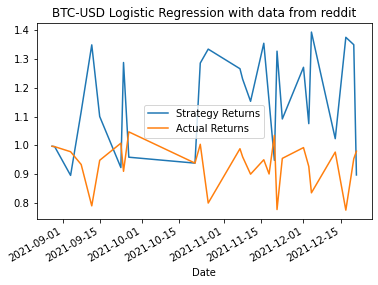

In [35]:
#cum_ret.plot(title=coin_ticker+' Logistic Regression w short='+str(short_window)+' long='+str(long_window))
#plt.savefig(source+'_'+prefix+'_Log_reg_SMA_short'+str(short_window)+'_long'+str(long_window)+'.png')
cum_ret.plot(title=coin_ticker+' Logistic Regression with data from '+source)
plt.savefig(source+'_'+prefix+'_Log_reg.png')

In [36]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[73 45]
 [70 62]]


In [37]:
# Print classification report
class_rep = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.51      0.62      0.56       118
         1.0       0.58      0.47      0.52       132

    accuracy                           0.54       250
   macro avg       0.54      0.54      0.54       250
weighted avg       0.55      0.54      0.54       250



In [38]:
results_dict = {
    'Date': pd.datetime.today(),
    "Model": 'LogisticRegression',
    'DataSource': source,
    'Coin': coin_ticker,
    'Short': short_window,
    'Long': long_window,
    'Accuracy':class_rep['accuracy'],
    'Recall 1': class_rep['1.0']['recall'],
    'Recall -1': class_rep['-1.0']['recall']
}

# To store classification report stats in a dataframe and then to a csv file for later retrieval
results_df = pd.DataFrame([results_dict])

C:\Users\kraso\AppData\Local\Temp\ipykernel_5356\3351209814.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  'Date': pd.datetime.today(),


In [39]:
# Instantiate a linear SVM model
svm = SVC(kernel='linear')
y_pred = ml.model_fit_predict(svm, X_resampled, y_resampled, X_test_scaled)
#y_pred = ml.model_fit_predict(svm, X_train_scaled, y_train, X_test_scaled)

# Print classification report
class_rep = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.51      0.76      0.61       118
         1.0       0.61      0.33      0.43       132

    accuracy                           0.54       250
   macro avg       0.56      0.55      0.52       250
weighted avg       0.56      0.54      0.51       250



In [40]:
results_dict = {
    'Date': pd.datetime.today(),
    "Model": 'SVC Model',
    'DataSource': source,
    'Coin': coin_ticker,
    'Short': short_window,
    'Long': long_window,
    'Accuracy':class_rep['accuracy'],
    'Recall 1': class_rep['1.0']['recall'],
    'Recall -1': class_rep['-1.0']['recall']
}

# To store classification report stats in a dataframe and then to a csv file for later retrieval
results_df = results_df.append(results_dict, ignore_index=True)

C:\Users\kraso\AppData\Local\Temp\ipykernel_5356\1087182049.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  'Date': pd.datetime.today(),
C:\Users\kraso\AppData\Local\Temp\ipykernel_5356\1087182049.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_dict, ignore_index=True)


In [41]:
# Get cumulative returns for Actual and Strategy Returns
cum_ret1 = ml.get_Strategy_and_Actual_returns(X_test.index, y_pred, X_test_df)

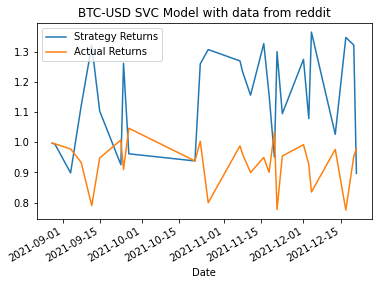

In [42]:
#cum_ret.plot(title=coin_ticker+' SVC Model w short='+str(short_window)+' long='+str(long_window))
#plt.savefig(source+'_'+prefix+'_SVC_SMA_short'+str(short_window)+'_long'+str(long_window)+'.png')
cum_ret1.plot(title=coin_ticker+' SVC Model with data from '+source)
plt.savefig(source+'_'+prefix+'_SVC.png')
#plt.savefig(source+'_'+prefix+'_SVC_SMA_short'+str(short_window)+'_long'+str(long_window)+'.png')

#cum_ret.plot(title=coin_ticker+ ' SVC Model w short=6 long=100)')
#plt.savefig(prefix+ '_SVC_SMA_short6_long100.png')

In [43]:
model_abc = AdaBoostClassifier(n_estimators=80)
y_pred = ml.model_fit_predict(model_abc, X_resampled, y_resampled, X_test_scaled)
#y_pred = ml.model_fit_predict(model_abc, X_train_scaled, y_train, X_test_scaled)


In [44]:
class_rep = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.49      0.53      0.51       118
         1.0       0.55      0.51      0.53       132

    accuracy                           0.52       250
   macro avg       0.52      0.52      0.52       250
weighted avg       0.52      0.52      0.52       250



In [49]:
results_dict = {
    'Date': pd.datetime.today(),
    "Model": 'AdaBoost Model',
    'DataSource': source,
    'Coin': coin_ticker,
    'Short': short_window,
    'Long': long_window,
    'Accuracy':class_rep['accuracy'],
    'Recall 1': class_rep['1.0']['recall'],
    'Recall -1': class_rep['-1.0']['recall']
}

# To store classification report stats in a dataframe and then to a csv file for later retrieval
results_df = results_df.append(results_dict, ignore_index=True)

C:\Users\kraso\AppData\Local\Temp\ipykernel_5356\876585405.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  'Date': pd.datetime.today(),
C:\Users\kraso\AppData\Local\Temp\ipykernel_5356\876585405.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_dict, ignore_index=True)


In [50]:
cum_ret = ml.get_Strategy_and_Actual_returns(X_test.index, y_pred, X_test_df)

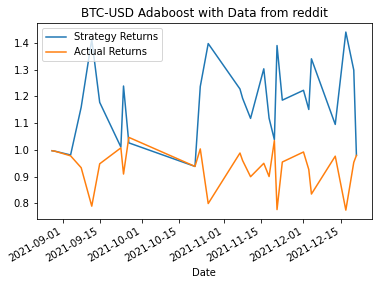

In [51]:
#cum_ret.plot(title=coin_ticker+' Adaboost w short='+str(short_window)+' long='+str(long_window))
#plt.savefig(source+'_'+prefix+'_Adaboost_SMA_short'+str(short_window)+'_long'+str(long_window)+'.png')
cum_ret.plot(title=coin_ticker+' Adaboost with Data from '+source)
plt.savefig(source+'_'+prefix+'_Adaboost.png')
#plt.savefig(source+'_'+prefix+'_Adaboost_SMA_short'+str(short_window)+'_long'+str(long_window)+'.png')

#cum_ret.plot(title=coin_ticker+ ' Adaboost Model w short=6 long=100)')
#plt.savefig(prefix+ '_Adaboost_SMA_short6_long100.png')

In [52]:
model_rfc = RandomForestClassifier(n_estimators=6, max_depth=None,
                               min_samples_split=2, random_state=0)
# seems like Beyod n_estimators= 5, the accuracy begins to drop below 50%

In [53]:
y_pred = ml.model_fit_predict(model_rfc, X_resampled, y_resampled, X_test_scaled)
#y_pred = ml.model_fit_predict(model_rfc, X_train_scaled, y_train, X_test_scaled)

cum_ret = ml.get_Strategy_and_Actual_returns(X_test.index, y_pred, X_test_df)
class_rep = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.47      0.64      0.54       118
         1.0       0.52      0.35      0.42       132

    accuracy                           0.48       250
   macro avg       0.49      0.49      0.48       250
weighted avg       0.49      0.48      0.47       250



In [54]:
results_dict = {
    'Date': pd.datetime.today(),
    "Model": 'RandomForest Model',
    'DataSource': source,
    'Coin': coin_ticker,
    'Short': short_window,
    'Long': long_window,
    'Accuracy':class_rep['accuracy'],
    'Recall 1': class_rep['1.0']['recall'],
    'Recall -1': class_rep['-1.0']['recall']
}

# To store classification report stats in a dataframe and then to a csv file for later retrieval
results_df = results_df.append(results_dict, ignore_index=True)

C:\Users\kraso\AppData\Local\Temp\ipykernel_5356\2104440028.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  'Date': pd.datetime.today(),
C:\Users\kraso\AppData\Local\Temp\ipykernel_5356\2104440028.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_dict, ignore_index=True)


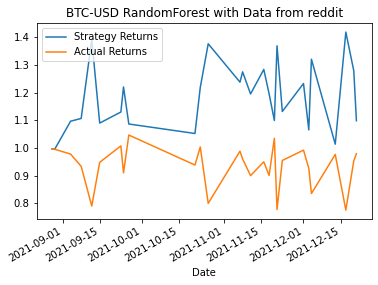

In [55]:
cum_ret.plot(title=coin_ticker+' RandomForest with Data from '+source)
plt.savefig(source+'_'+prefix+'_RandomForest.png')

#plt.savefig(source+'_'+prefix+'_RandomForest_SMA_short'+str(short_window)+'_long'+str(long_window)+'.png')

#cum_ret.plot(title=coin_ticker+' RandomForest w short='+str(short_window)+' long='+str(long_window))
#plt.savefig(source+'_'+prefix+'_RandomForest_SMA_short'+str(short_window)+'_long'+str(long_window)+'.png')

#cum_ret.plot(title=coin_ticker+ ' RandomForest Model w short=6 long=100)')
#plt.savefig(prefix+ '_RandomForest_SMA_short6_long100.png')

In [56]:
results_df.to_csv(source+'_classification_reports.csv', mode='a', header=None)